
# Autoencoders (AE)

- [AE 소개영상 1](https://youtu.be/YxtzQbe2UaE)
- [AE 소개영상 2](https://youtu.be/54hyK1J4wTc?t=889)
- [AE 소개영상 3(영어)](https://youtu.be/3jmcHZq3A5s?t=93)

  오토인코더(Autoencoders)는 입력데이터 자체를 레이블로 활용하는 학습방식으로, 별도의 레이블이 필요하지 않는 비지도학습 방식입니다.   이는  데이터 코딩(encoding, decoding)을 위해서 원하는 차원만 할당해주면, 자동으로 학습하여 원하는 형태로 데이터의 차원을 축소해주는 신경망의 한 어플리케이션입니다. <br><br>
  오토 인코더의 목적은 네트워크가 중요한 의미를 갖는 신호 외의 "노이즈"를 제거하도록 훈련함으로써 일반적인 차원 축소 방법론들과 비슷한 목적으로 활용됩니다. 여기서 코딩된 코드영역을 입력 데이터의 잠재적 표현(Latent representation)이라고 부르게 됩니다. <br><br>
  데이터를 잠재적 표현으로 변경하는 차원축소과정(encoding)과 잠재적 표현에서 다시 데이터로 재구성과정(decoding)은 각각의 가중치들의 연산을 통해서 이뤄지고, 이를 신경망을 통해서 학습합니다. <br><br>
  그리고 학습 과정에서는 인코딩 모델(파라미터)과 디코딩 모델(파라미터)가 동시에 학습이 되지만, 이를 각각의 모델로 구분하여 사용할 수 있습니다. <br><br>
  오토인코더를 통하여, 데이터의 노이즈를 제거하도록 학습하면, 노이즈가 제거된 데이터의 특징값을 추출하는 특성값 추출기(Feature extractor)로 활용할 수 있고, 이 모델을 다양한 방식으로 활용할 수 있습니다. 

# 학습목표
- AutoEncoder (AE)의 구성에 대해서 설명할 수 있어야 합니다. 
- AE의 학습과정을 이해할 수 있다. 
- Latent variable의 추상적 개념을 정의할 수 있고,
- 이를 활용하여 기본적인 information retrieval problem를 해결해본다.
- AE의 활용방안에 대해서 생각해볼 수 있다. 


Q. label이 없이도 이미지를 일정 크기의 벡터로 자동 표현할 수 있을까?

그러면 왜 고정된 크기의 벡터로 표현해야 할까요?

* __Information Retrieval__
    - [Reverse Image Search](https://en.wikipedia.org/wiki/Reverse_image_search)
    - [Recommendation Systems - Content Based Filtering](https://en.wikipedia.org/wiki/Recommender_system#Content-based_filtering)
* __Dimensionality Reduction__
    - [Feature Extraction](https://www.kaggle.com/c/vsb-power-line-fault-detection/discussion/78285)
    - [Manifold Learning](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction) 

자연어처리(NLP)를 학습기간동안 단어 임베딩 모델에 서 **representation learning**에 대해서 체험한 바 있습니다. 오늘 우리는 오토인코더를 사용하여 Word2Vec처럼, Image2Vec형태로 이미지를 벡터화 하는 것과 유사한 목표를 달성할 수 있습니다. <br><br>

 **오토인코더는 "출력 = 입력"을 학습시키는 신경망**입니다. '비지도학습'이라고도 하지만,  Self-supervised learning(SSL)의 워딩과도 비슷한 개념입니다. 물론 SSL은 더 복잡한 과정이 있긴하지만, 이해를 위해서 이렇게 표현해 보았습니다. 
<br><br> 
 학습이 완료된 후에도 일반적으로 입력과 완벽히 똑같은 출력을 만들 수는 없겠지만, 매우 근사한 수치로 복제됩니다. **Loss function에서 입력과 출력의 차이를 이용하기 때문에 출력은 입력과 최대한 근사**하게 만들기 위해서 Latent representation 으로 encoding하고, 다시 data로 decoding하면서 이 latent는 데이터의 정보량이 많은 부분, 또는 대표적인 속성을 우선학습하게 됩니다. 이렇기 때문에 **AE를 생성 모델적 접근 방식**에서도 중요한 부분으로 다뤄지게 됩니다. 이후에 학습하게될 생성모델의 대표적인 모델인 생성적 대립 신경망 (**GAN**)에서도 배우겠지만, 인코더와 디코더가 있는 구조를 이용해서 생성모델을 구현할 수 있습니다. 
 <br><br> 
 이렇게 오토인코더는 다양한 방식으로 활용할 수 있지만, 기존 신경망(우리가 그간 써왔던 신경망 종류)의 원리가 동일하며, 또한 신경망의 특이 케이스라 생각하시고 학습하시면 됩니다. 그렇기 때문에 기존에 배운 **역전파 및 경사하강법은 여기에도 잘 동작**합니다.

# AutoEncoder 개요

그림의 Input에서 Code(Latent)까지 `Encoder`는 입력 데이터를 압축하고 `decoder`는 압축되지 않은 버전의 데이터를 생성하여 가능한 한 정확하게 입력을 재구성합니다.


<img src='https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png' width=800/>

학습과정 -> minimizing a loss function: 
$ L(x, g(f(x))) $

- $L$ 은 손실함수, $g(f(x))$와 $x$의 dissimiliarity (예, mean squared error)
- $f$ 는 encoder function
- $g$ 는 decoder function
<br>
<br>



AutoEncoder의 기본적인 구조는 위 그림처럼 모래시계(?) 형태를 띠고 있습니다.<br/>
위에 Code 라고 표시된 가장 저차원의 벡터는 **Latent(잠재) 벡터**라고도 하는데요.<br/>
<font color="ff6f61">**Latent(잠재) 벡터**</font>란 원본 데이터보다 차원이 작으면서도, 원본 데이터의 특징을 잘 보존하고 있는 벡터를 말합니다.<br/>
AutoEncoder는 궁극적으로 이 Latent 벡터를 잘 얻기 위한 방법이라고 할 수 있겠습니다.

### AutoEncoder 활용하기

AutoEncoder의 대표적인 쓰임새는 다음과 같습니다.

- **차원 축소(Dimensionality Reduction)와 데이터 압축**
- **데이터 노이즈 제거(Denoising)**
- **이상치 탐지(Anomaly Detection)**

기본적인 형태의 AutoEncoder 부터 예제를 통해 알아보도록 하겠습니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Example 1 : 기본적인 AutoEncoder


<img src="https://www.tensorflow.org/tutorials/generative/images/intro_autoencoder_result.png"/>
이미지를 64 차원 잠재 벡터로 압축하는 가장 간단한 형태의 `encoder`와 잠재 공간에서 원본 이미지를 재구성하는 `decoder`라는 두 개의 Dense 레이어로 구성된 모델입니다. 

모델을 정의하려면 [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models)를 사용하세요.

### 데이터 세트로드
시작하려면 Fashion MNIST dataset을 이용하여 오토인코더를 학습합니다. 

이 데이터 세트의 각 이미지는 28x28 픽셀입니다.

Example 1, 2 에서는 Fashion MNIST 데이터셋을 다시 사용해보겠습니다.

1. **필요한 라이브러리를 Import 하여줍니다.**

2. **데이터셋을 불러온 뒤 정규화 하여줍니다.**

    본 예제에서는 레이블은 사용하지 않기 때문에 `_` 로 처리하여줍니다.

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


3. **AutoEncoder 모델을 구축합니다.**

In [3]:
# Code영역의 벡터(= Latent vector)의 수 정의
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
# decoded된 데이터를 output으로 설정함
autoencoder = Autoencoder(latent_dim) 

4. **모델을 `compile` 해준 후에 학습합니다.**

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

`x_train`을 입력 및 대상으로 사용하여 모델을 훈련시킵니다. 

`encoder`는 데이터 세트를 784(28x28) 차원에서 latent 공간으로 압축하는 방법을 배우고 

`decoder`는 원본 이미지를 재구성하는 방법을 배웁니다.

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 23s 7ms/step - loss: 0.0234 - val_loss: 0.0130
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0114 - val_loss: 0.0104
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

5. **학습된 모델을 사용하여 시험(`test`) 이미지를 인코딩 후 디코딩하여줍니다.**

    이후 특정 10개의 이미지를 시각화하여 잘 복원되었는지 확인해봅니다.

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

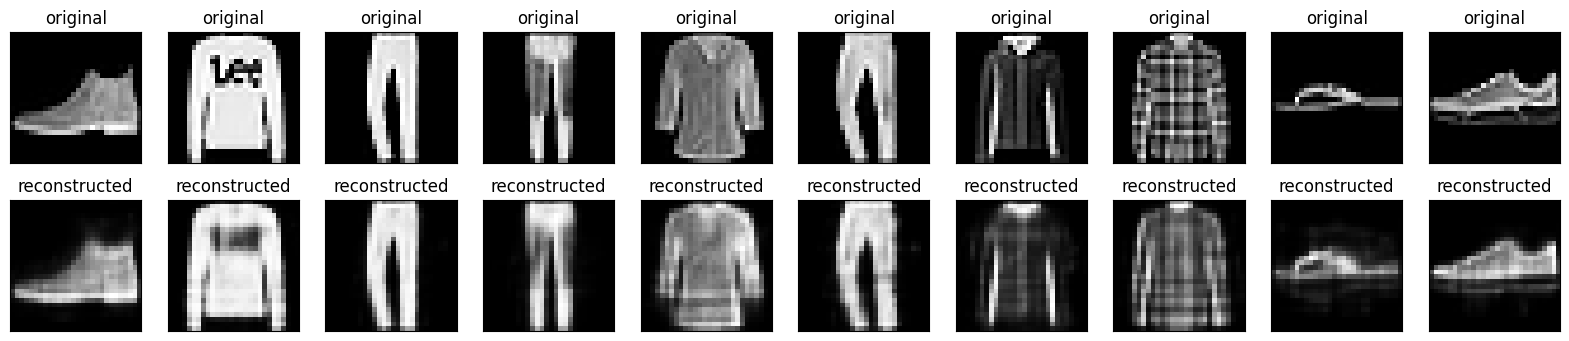

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Examle 2 : DAE(Denoising AutoEncoder)



### 노이즈 제거용 오토인코더


<img src="https://www.tensorflow.org/tutorials/generative/images/image_denoise_fmnist_results.png" />

오토인코더는 이미지에서 노이즈를 제거하도록 훈련 될 수도 있습니다. 다음 섹션에서는 각 이미지에 임의의 노이즈를 적용하여 Fashion MNIST 데이터 세트의 노이즈 버전을 생성합니다. 그런 다음 잡음이있는 이미지를 입력으로 사용하고 원본 이미지를 대상으로 사용하여 오토 인코더를 훈련합니다.

이전에 수정 한 내용을 생략하기 위해 데이터 세트를 다시 가져 오겠습니다.

1. **데이터셋을 불러온 뒤 정규화 하여줍니다.**

    이번에는 Encoder/Decoder 에서 완전 연결 신경망(**`Dense`**)이 아닌 Convolution 층(**`Conv2D`**)을 사용해보겠습니다.<br/>
이러한 AutoEncoder 를 **Convolutional AutoEncoder** 라고도 부릅니다.<br/>
데이터셋을 Convolutional AutoEncoder 에 적용하기 위해서는 데이터에 임의의 채널을 더하는 과정이 필요합니다.

In [8]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


2. **Random Noise 추가**

    모델이 Noise 있는 이미지 데이터를 입력받을 수 있도록 임의의 Noise 를 추가합니다.<br/>
    Noise를 추가한 이미지를 시각화 해봅니다.


In [10]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

노이즈가 더해진 이미지를 시각화해보면 다음과 같습니다.

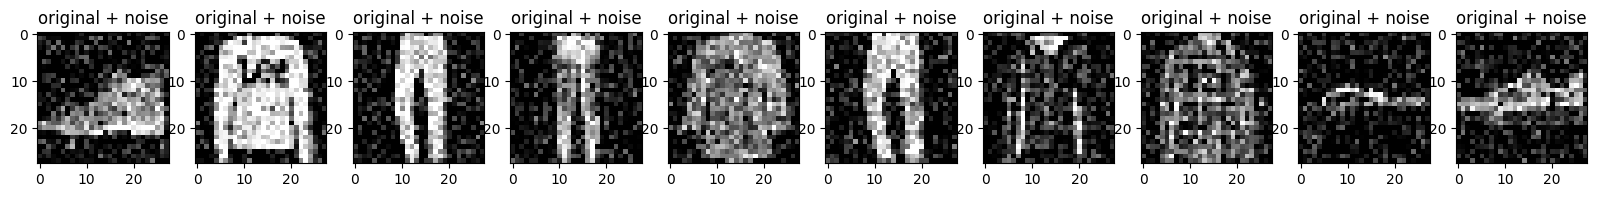

In [11]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

3. **Denoising AutoEncoder 모델을 구축합니다.**

### convolutional autoencoder

이번 예제는 같은 원리르 갖지만, 가중치의 형태를 CNN형태로 가져옵니다. 

[Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) 레이어를 `encoder`로 사용하고, 반대로 `decoder`로는 [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) 를 사용하는 구조입니다.

In [12]:
# CNN의 형태를 갖는 autoencoder 코드
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [13]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

입력 데이터는 Noise 있는 데이터, Target 데이터는 원본 이미지가 되어야합니다.

In [14]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 17s 5ms/step - loss: 0.0176 - val_loss: 0.0095
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - lo

인코더 구조의 summary를 살펴 보겠습니다. 

이미지가 28x28에서 7x7로 어떻게 다운 샘플링되는지 확인하십시오.

In [15]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


디코더의 구조입니다.

In [16]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


5. **학습된 모델을 사용하여 시험(`test`) 이미지를 인코딩 후 디코딩하여줍니다.**

    이후 특정 10개의 이미지를 시각화하여 잘 복원되었는지 확인해봅니다.

이 모델로 이미지가 어떻게 변환되는 지 확인해보겠습니다.

In [17]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

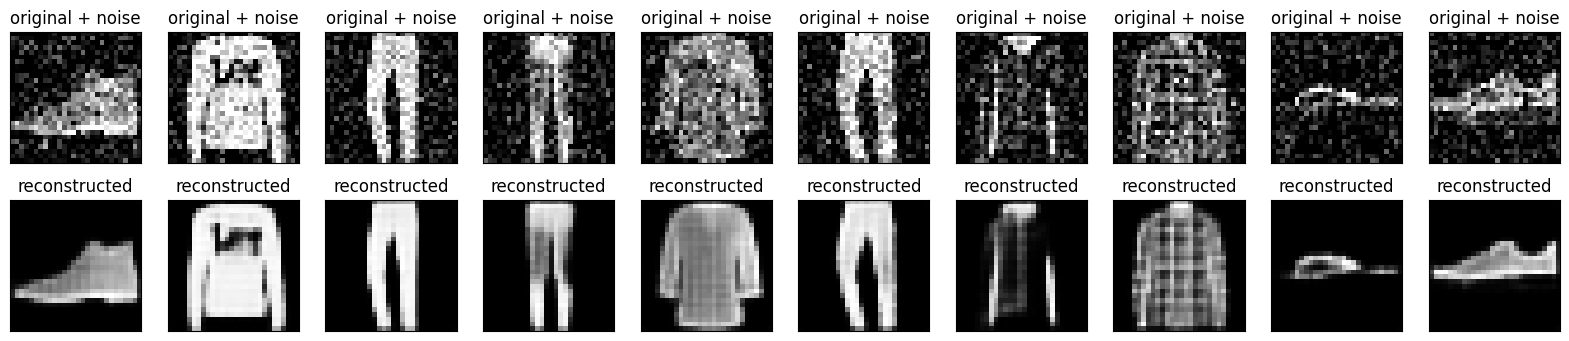

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Example 3 : 이상치 탐지(Anomaly Detection)

비정상 데이터를 탐지하기 위한 **<font color="ff6f61">이상치 탐지(Anomaly Detection)</font>**에도 AutoEncoder 를 사용할 수 있습니다.<br/>
AutoEncoder는 특정 데이터의 중요 특징, 즉 잠재 벡터를 바탕으로<br/>
다시 원본 데이터로 **복원할 때에 발생하는 오류, 즉 복원 오류(Reconstruction Error)**를 최소화 하도록 훈련됩니다.

정상 데이터로만 훈련한 뒤에 비정상 데이터셋을 복원한다면 복원 오류가 커질 것입니다.<br/>
복원 오류가 특정한 임계값을 초과하는 경우 해당 데이터를 비정상으로 판단할 수 있습니다.

### 3. 이상현상 발견 용 오토인코더

이 예제에서는 [ECG 5000 데이터 세트](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000)에서 이상현상을 감지하도록 오토인코더를 훈련시킵니다. 이 데이터에는 각각 140개의 데이터로 구성된 5,000 개의 [심전도(ECG, Electrocardiograms)](https://en.wikipedia.org/wiki/Electrocardiography)가 포함되어 있습니다. 각 예제는 '0'(비정상 리듬에 해당) 또는 '1'(정상 리듬에 해당)으로 레이블이 지정된 단순화 된 버전의 데이터 세트를 사용합니다. 비정상적인 리듬을 식별해볼 것입니다.

- 참고 : 이 예제는 레이블이 지정된 데이터세트이므로 지도학습 문제라고 할 수 있습니다. 이 예제의 목표는 사용 가능한 레이블이 없는 더 큰 데이터 세트에 적용할 수 있는 이상현상 감지 개념을 설명하는 것입니다 (예, 수천 개의 정상 리듬이 있고 비정상 리듬이 적은 경우).

- 오토 인코더를 사용하여 어떻게 이상 현상을 감지합니까? 오토 인코더는 재구성 오류를 최소화하도록 훈련되었습니다. 오토 인코더를 정상적인 리듬으로 만 훈련한 뒤 이를 사용하여 모든 데이터를 재구성합니다. 여기서 우리의 가설은 비정상적인 리듬이 더 높은 재건(reconstruction) 오류를 가질 것이라는 것입니다. 이것을 이용하여 오류가 "임계 값"을 초과하는 경우 리듬을 이상으로 분류하는 것입니다. 

### 데이터 불러오기 : ECG data

1. **데이터셋 다운로드 후 전처리 및 분리(`split`)합니다.**

    Feature(**`data`**)와 Label(**`label`**)을 구분한 후에 분리합니다.

데이터를 이용하여 시계열의 데이터를 분류할 것입니다.  [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [19]:
# 데이터셋을 불러옵니다. 
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [20]:
# 마지막으로 포함된 레이블을 따로 저장합니다.
labels = raw_data[:, -1]

# 데이터에서는 레이블을 제거해줍니다.
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

2. **데이터셋을 정규화합니다.**

    MinMaxScaling 방식을 적용합니다.

In [21]:
# min-max 알고리즘을 이용하여 정규화합니다. 
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

앞서 설명한 것처럼 모델 학습을 할 때에는 데이터세트 중에서 '1'로 레이블이 지정된 일반(정상) 리듬 만 사용하여 오토인코더를 훈련합니다. 

3. **정상 데이터셋과 비정상 데이터셋을 분리합니다.**

    모델 학습 시에는 데이터셋에서 **`1`**로 레이블이 지정된 정상 데이터만 사용합니다.

In [22]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

4. **정상 데이터셋과 비정상 데이터셋 중 특정 데이터를 각각 시각화 해봅시다.**

ECG의 파장을 한번 플로팅 해보겠습니다.

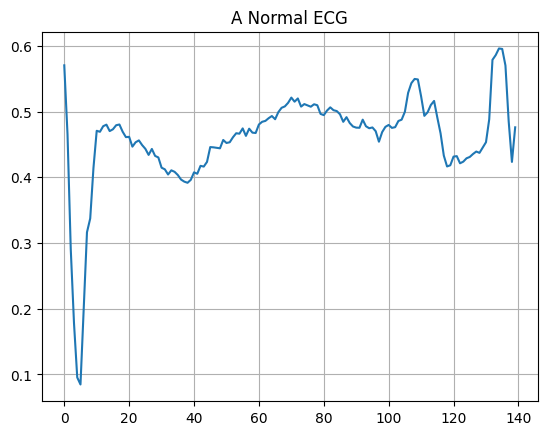

In [23]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

이상현상이 발생한 ECG 데이터 역시 플로팅해보겠습니다.

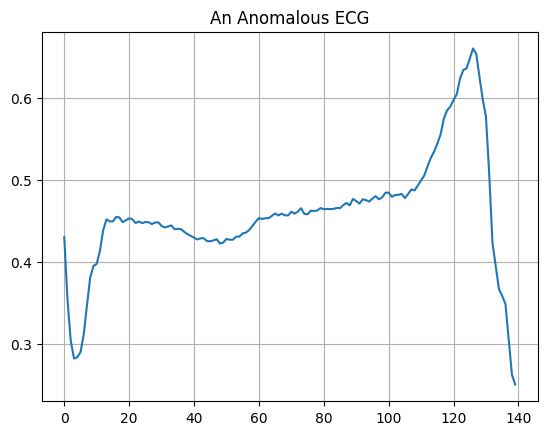

In [24]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### 학습 모델 구축
5. **AutoEncoder 모델을 구축한 후에 학습합니다.**

    손실 함수로는 MAE를 사용하겠습니다.<br/>
    학습 시에는 정상 데이터만 사용하여야 함을 잊지 않도록 합니다.
    

In [25]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [26]:
autoencoder.compile(optimizer='adam', loss='mae')

정상 ECG 만 사용하여 훈련하고, 테스트 용도에서는 정상과 비정상이 섞인 상태를 평가하게 됩니다. 

In [27]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 3s 48ms/step - loss: 0.0583 - val_loss: 0.0537
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0569 - val_loss: 0.0526
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0555 - val_loss: 0.0513
Epoch 4/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0534 - val_loss: 0.0494
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0502 - val_loss: 0.0473
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0459 - val_loss: 0.0458
Epoch 7/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0417 - val_loss: 0.0442
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0374 - val_loss: 0.0415
Epoch 9/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0336 - val_loss: 0.0399
Epoch 10/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0307 - val_loss: 0.0392
Epoch 11/20
5/5 [============

학습 곡선을 시각화합니다.

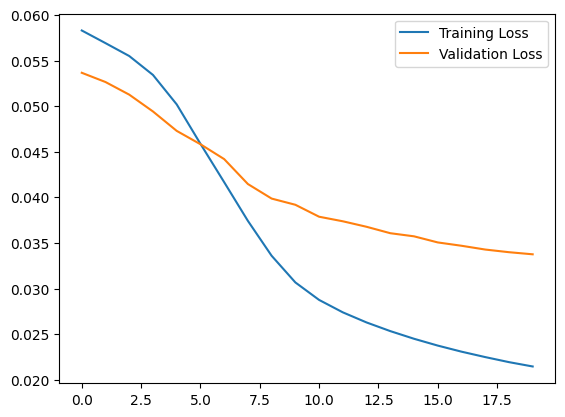

In [28]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

6. **학습한 AutoEncoder를 사용하여 복원 오류를 시각화해봅니다.**

먼저 정상 데이터와 AutoEncoder에 의한 복원을 비교한 그래프를 Plot 합니다.

재구성 오류가 일반 ECG의 표준 편차 1보다 큰 경우 ECG를 비정상으로 분류하도록 정의합니다.

먼저 학습 세트에서 일반 ECG, 오토 인코더에 의해 인코딩 및 디코딩 된 후의 재구성 및 재구성 오류를 플로팅 해 보겠습니다.

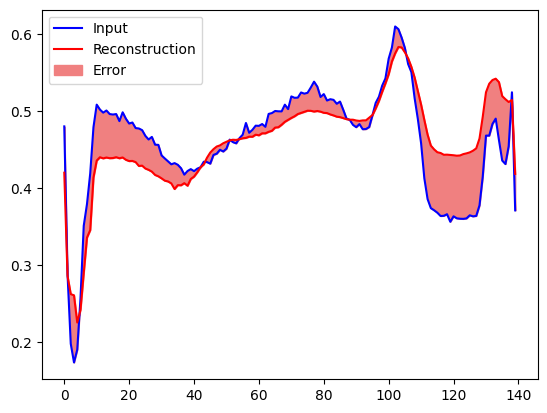

In [29]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

같은 방식의 이상현상(anomalous) 샘플을 플로팅 해봅니다. 

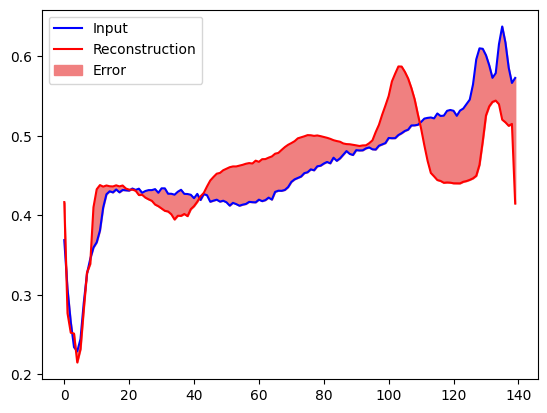

In [30]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### 이상현상 탐지해보기

7. **본격적으로 이상치를 판단해봅시다.**

    본 예제에서는 고정된 임계값(=정상 데이터셋에 대한 복원 오류 평균 + 표준편차)을 사용합니다.<br/>
    입력된 데이터에 대한 복원 오류가 고정된 임계값보다 클 경우 이상치로 판단할 것입니다.

재구성 손실이 고정 임계 값보다 큰지 여부를 계산하여 이상을 감지합니다. 
이 튜토리얼에서는 훈련 세트의 정상 예제에 대한 평균 오차(MAE)를 계산 한 다음 재구성 오차가 훈련 세트의 표준 편차보다 큰 경우 향후 예제를 비정상적인 것으로 분류합니다.

훈련 세트의 정상 ECG에 대한 재구성 오류를 플로팅합니다.

먼저 정상 데이터셋에 대한 훈련 오차(**`train_loss`**)를 시각화해보고 임계값을 구합니다.


74/74 [==============================] - 0s 2ms/step


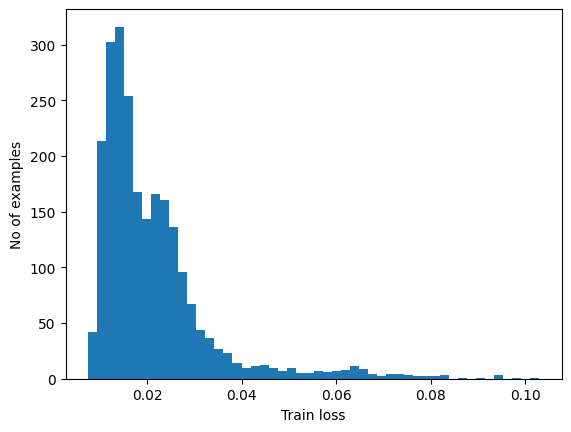

In [31]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

평균보다 1SD(1 표준편차만큼)가 높은 임계 값을 선택합니다.

(참고로 통계 수준에서 2SD를 벗어나게 되면, 95%의 신뢰구간을 벗어나는 것을 의미합니다)

In [32]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03344631


참고: 이 문제를 해결하는 다른 전략도 분명 있습니다. 

어떤 데이터를 가지고 어떤 문제를 풀것인지에 따라 전략이 바뀔 수 있으니, 이 방법이 절대적으로 옳은 방법은 아닙니다. 

테스트 세트의 비정상적인 예제에 대한 재구성 오류를 검사하면 대부분 임계값보다 재구성 오류가 크다는 것을 알 수 있습니다. 임계값을 바꿈으로써 분류기의 [precision](https://developers.google.com/machine-learning/glossary#precision) 및 [recall](https://developers.google.com/machine-learning/glossary#recall)를 조정할 수 있습니다. 이 방법에 대해서는 지난 이전 섹션들에서 다뤄졌기 때문에 간략히 넘어가도록 하겠습니다. 

다음으로 비정상 데이터셋에 대한 오차(**`train_loss`**)를 시각화합니다.

14/14 [==============================] - 0s 2ms/step


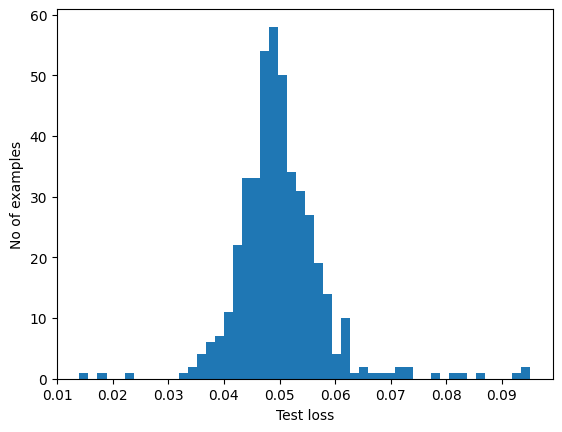

In [33]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

재구성 오류가 임계값보다 큰 경우 심전도를 이상 현상으로 분류하도록 설정합니다

In [34]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [35]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.9921875
Recall = 0.9071428571428571


# Review
 - Autoencoder는 encoder와 decoder로 구성되어 있다.
   * Decoder와 Encoder를 구분할 수 있다.
 - 단순한 Dense형태로도 구성할 수 있지만, CNN을 이용한 구성도 가능하다
   * 기본 오토인코더와 Convolution 오토인코더는 어디에서 차이가 날까? 
 - 오토인코더의 용도
   * 노이즈를 제거하는 용도로 사용할 수 있고, 
   * 재구성을 통한 이상값을 찾아내는 데도 사용할 수 있으며, 
   * 특성을 추출하는 용도로서도 사용할 수 있다.



#도전해보기
- 오토인코더를 사용한 이상 감지에 대해 자세히 알아 보려면 Victor Dibia가 TensorFlow.js로 빌드 한이 훌륭한 [대화 형 예제](https://anomagram.fastforwardlabs.com/#/)를 확인하세요. 
- 실제 TensorFlow 사용 사례 : [Airbus가 ISS 원격 측정 데이터에서 이상 징후를 감지](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data- tfx.html)
- 기본 사항에 대해 좀 더 자세히 알아 보려면 François Chollet의 [블로그 게시물](https://blog.keras.io/building-autoencoders-in-keras.html)을 읽어보십시오. 
- 책으로 더 자세히 보고 싶다면, Ian Goodfellow, Yoshua Bengio, Aaron Courville의 [Deep Learning](https://www.deeplearningbook.org/)의 14 장을 참조하세요.